This notebook demonstrates how to import your own file(s) and do data analytics.

In [0]:
!pip install --upgrade -q gspread

In [0]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

# enter the authorization code and press ENTER

In [0]:
# upload tips.csv (or any other file) on your Google drive (the same folder where you have this notebook) 
# Then open the file as Google sheet (this is important!!!). This creates a Google worksheet named "tips.csv"

sh = gc.create('tips.csv')

In [14]:
# Remember that a Google worksheet could have multiple sheets.
# Make sure the sheet name is sheet1. Otherwise, just rename it to sheet1 to use the code below
worksheet = gc.open('tips.csv').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print rows

# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame.from_records(rows)

[['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], ['16.99', '1.01', 'Female', 'No', 'Sun', 'Dinner', '2'], ['10.34', '1.66', 'Male', 'No', 'Sun', 'Dinner', '3'], ['21.01', '3.5', 'Male', 'No', 'Sun', 'Dinner', '3'], ['23.68', '3.31', 'Male', 'No', 'Sun', 'Dinner', '2'], ['24.59', '3.61', 'Female', 'No', 'Sun', 'Dinner', '4'], ['25.29', '4.71', 'Male', 'No', 'Sun', 'Dinner', '4'], ['8.77', '2', 'Male', 'No', 'Sun', 'Dinner', '2'], ['26.88', '3.12', 'Male', 'No', 'Sun', 'Dinner', '4'], ['15.04', '1.96', 'Male', 'No', 'Sun', 'Dinner', '2'], ['14.78', '3.23', 'Male', 'No', 'Sun', 'Dinner', '2'], ['10.27', '1.71', 'Male', 'No', 'Sun', 'Dinner', '2'], ['35.26', '5', 'Female', 'No', 'Sun', 'Dinner', '4'], ['15.42', '1.57', 'Male', 'No', 'Sun', 'Dinner', '2'], ['18.43', '3', 'Male', 'No', 'Sun', 'Dinner', '4'], ['14.83', '3.02', 'Female', 'No', 'Sun', 'Dinner', '2'], ['21.58', '3.92', 'Male', 'No', 'Sun', 'Dinner', '2'], ['10.33', '1.67', 'Female', 'No', 'Sun', 'Dinner', '3'], ['

In [15]:
df.head()

,0,1,2,3,4,5,6
0,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.5,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2


In [16]:
new_header = df.iloc[0]
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.5,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 1 to 244
Data columns (total 7 columns):
total_bill    244 non-null object
tip           244 non-null object
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null object
dtypes: object(7)
memory usage: 13.4+ KB


In [24]:
df['tip'] = df['tip'].astype(str).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 1 to 244
Data columns (total 7 columns):
total_bill    244 non-null object
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null object
dtypes: float64(1), object(6)
memory usage: 13.4+ KB


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

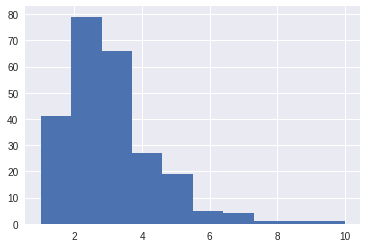

In [25]:
df['tip'].hist()